In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv('flag.data',
                 usecols=[3, 4, 5, 6, 7, 8, 9, 18, 19, 20, 21, 22],
                 names=['Area', 'Population', 'Language', 'Religion',
                        'Bars', 'Stripes', 'Colours', 'Circles', 'Crosses',
                        'Saltires', 'Quarters', 'Sunstars'])

прочитали данные, и добавили названия колонок, поскольку в файле нет заголовка

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 12 columns):
Area          194 non-null int64
Population    194 non-null int64
Language      194 non-null int64
Religion      194 non-null int64
Bars          194 non-null int64
Stripes       194 non-null int64
Colours       194 non-null int64
Circles       194 non-null int64
Crosses       194 non-null int64
Saltires      194 non-null int64
Quarters      194 non-null int64
Sunstars      194 non-null int64
dtypes: int64(12)
memory usage: 18.3 KB


In [5]:
# import pandas_profiling
# data.profile_report()

прежде чем использовать наивный байес, посмотрим на зависимости наших переменных

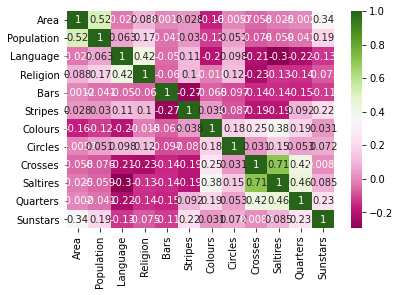

In [6]:
correlations = data.corr()
sns.heatmap(correlations, annot=True, cmap='PiYG')

отметим сильную зависимость между крестами и диагональными крестами (логично), также зависимость между популяцией и площадью (тоже логично), и заметна зависимость языка с религией (опять же логично)

In [7]:
features = data.drop(columns=['Language', 'Religion'])
labels = data['Religion']
sc = StandardScaler()
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [8]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 0.05128205128205128


модель угадывает в 60% случаев

In [9]:
gs = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 10, 20]})
gs.fit(train_features, train_labels)
knn = gs.best_estimator_
print('K = {}'.format(gs.best_params_['n_neighbors']))

K = 10


использовав gridsearch, нашли подходящий параметр k = 5

In [10]:
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 0.4358974358974359


knn показывает чуть лучше, чем байес, но хуже, чем байес с независимыми предикторами

In [11]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 0.28205128205128205


применив логистическую регрессию, получаем примерно то же самое

теперь попробуем добавить факторную переменную

In [12]:
features = data.drop(columns=['Religion'])
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [13]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 0.07692307692307693


видим, что фактор мешает классификатору.  
Причиной может быть то, что фактор имеет бинарное распределение.  
Попробуем байес с предположением о распределении Бернулли

результат не лучше

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 0.358974358974359


тут тоже хуже, чем без фактора

In [15]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 0.41025641025641024


а вот лог рег получил прибавку в ~0.01%

теперь попробуем отдельные выборки по фактору

In [16]:
data_english = data.loc[data['Language'] == 1].drop('Language', axis=1)
data_spanish = data.loc[data['Language'] == 2].drop('Language', axis=1)
data_french = data.loc[data['Language'] == 3].drop('Language', axis=1)
data_german = data.loc[data['Language'] == 4].drop('Language', axis=1)
data_slavic = data.loc[data['Language'] == 5].drop('Language', axis=1)
data_indo_eu = data.loc[data['Language'] == 6].drop('Language', axis=1)
data_chinese = data.loc[data['Language'] == 7].drop('Language', axis=1)
data_arabic = data.loc[data['Language'] == 8].drop('Language', axis=1)
data_jpn_tur_fin_mag = data.loc[data['Language'] == 9].drop('Language', axis=1)
data_other = data.loc[data['Language'] == 10].drop('Language', axis=1)

In [17]:
features = data_english.drop(columns='Religion')
labels = data_english['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [18]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 0.5555555555555556


In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 0.8888888888888888


In [20]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 0.6666666666666666


In [21]:
features = data_spanish.drop(columns='Religion')
labels = data_spanish['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [22]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 1.0


In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 1.0


In [24]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 1.0


In [25]:
features = data_french.drop(columns='Religion')
labels = data_french['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [26]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 0.0


In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 0.0


In [28]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 0.0


In [29]:
features = data_german.drop(columns='Religion')
labels = data_german['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [30]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 0.0


In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 0.0


In [32]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 0.0


In [33]:
features = data_slavic.drop(columns='Religion')
labels = data_slavic['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [34]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 1.0


In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 1.0


In [36]:
# reg = LogisticRegression()
# reg.fit(train_features, train_labels)
# print('Score: {}'.format(reg.score(test_features, test_labels)))

In [37]:
labels

26     6
45     6
138    6
184    6
Name: Religion, dtype: int64

In [38]:
features = data_indo_eu.drop(columns='Religion')
labels = data_indo_eu['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [39]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 0.3333333333333333


In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 0.5


In [41]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 0.6666666666666666


In [42]:
features = data_chinese.drop(columns='Religion')
labels = data_chinese['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [43]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 1.0


In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 1.0


In [45]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 1.0


In [46]:
features = data_arabic.drop(columns='Religion')
labels = data_arabic['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [47]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 1.0


In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 1.0


In [49]:
# reg = LogisticRegression()
# reg.fit(train_features, train_labels)
# print('Score: {}'.format(reg.score(test_features, test_labels)))

In [50]:
labels

2      2
13     2
51     2
84     2
91     2
95     2
97     2
100    2
110    2
117    2
129    2
131    2
141    2
146    2
155    2
162    2
167    2
174    2
178    2
Name: Religion, dtype: int64

In [51]:
features = data_jpn_tur_fin_mag.drop(columns='Religion')
labels = data_jpn_tur_fin_mag['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [52]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 0.0


In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 0.0


In [54]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 0.0


In [55]:
features.shape

(4, 10)

In [56]:
labels

58     1
79     6
90     7
175    2
Name: Religion, dtype: int64

In [57]:
features = data_other.drop(columns='Religion')
labels = data_other['Religion']
features = sc.fit_transform(features)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, train_size=0.8, random_state=33)

In [58]:
bayes = GaussianNB()
bayes.fit(train_features, train_labels)
print('Score: {}'.format(bayes.score(test_features, test_labels)))

Score: 0.2


In [59]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
print('Score: {}'.format(knn.score(test_features, test_labels)))

Score: 0.2


In [60]:
reg = LogisticRegression()
reg.fit(train_features, train_labels)
print('Score: {}'.format(reg.score(test_features, test_labels)))

Score: 0.3
